<a href="https://colab.research.google.com/github/MominulHaque666/TitanicSurvivalAnalysis/blob/main/Notebook/TitanicSurvivalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import xgboost as xgb

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import  accuracy_score, f1_score, precision_score, classification_report, confusion_matrix, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import accuracy_score

In [ ]:
# Upload both of the train & test dataset

train = 'https://raw.githubusercontent.com/MominulHaque666/TitanicSurvivalAnalysis/main/Dataset/train.csv'
test = 'https://raw.githubusercontent.com/MominulHaque666/TitanicSurvivalAnalysis/main/Dataset/test.csv'

In [ ]:
# Read the train dataset

train_df = pd.read_csv(train)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Read the test dataset

test_df = pd.read_csv(test)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# number of unique values
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
# number of unique values
test_df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [ ]:
#checking for missing values
train_df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#checking for missing values
test_df.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Train data descriptive statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Train data descriptive statistics
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


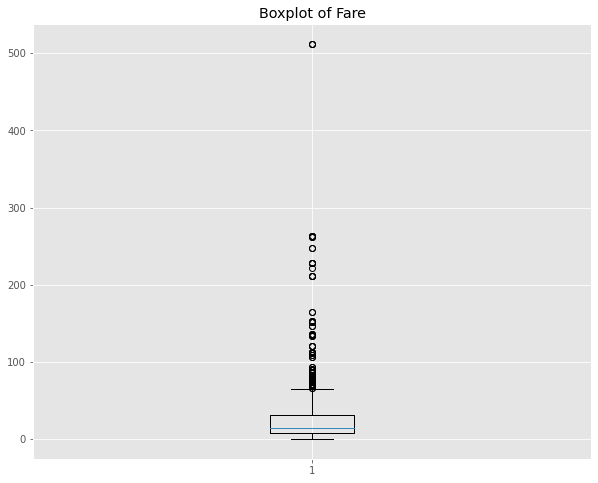

In [ ]:
plt.subplots(figsize=(10, 8))
plt.boxplot(train_df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [ ]:
# Retrieve rows with Fare greater than 500
train_df[train_df['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
# Retrieve rows with Fare equal to 0
train_df[train_df['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [ ]:
# Function to extract title from passenger's name
def extract_title(df):
    title = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
    return title

In [59]:
# Count of each title in train data
train_df['Title'] = extract_title(train_df)
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Mme               1
the Countess      1
Sir               1
Don               1
Capt              1
Ms                1
Jonkheer          1
Lady              1
Name: Title, dtype: int64

In [60]:
# Count of each title in test data
test_df['Title'] = extract_title(test_df)
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [61]:
# Function to map titles to main categories
def map_title(df):
    title_category = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
    }
    new_title = df['Title'].map(title_category)
    return new_title

In [62]:
# Count of each title in train data after mapping
train_df['Title'] = map_title(train_df)
train_df['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [63]:
# Count of each title in test data after mapping
test_df['Title'] = map_title(test_df)
test_df['Title'].value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royalty      1
Name: Title, dtype: int64

In [64]:
# Group train data by 'Pclass', 'Title' and calculate the median age
train_df.groupby(['Pclass', 'Title']).median()['Age']

Pclass  Title  
1       Master      4.0
        Miss       30.0
        Mr         40.0
        Mrs        40.0
        Officer    50.0
        Royalty    40.0
2       Master      1.0
        Miss       24.0
        Mr         31.0
        Mrs        31.5
        Officer    46.5
3       Master      4.0
        Miss       18.0
        Mr         26.0
        Mrs        31.0
Name: Age, dtype: float64

In [65]:
# Function to identify passengers who have the title 'Miss' and, 1 or 2 value in the 'Parch' column
def is_young(df):
    young = []
    for index, value in df['Parch'].items():
        if ((df.loc[index, 'Title'] == 'Miss') and (value == 1 or value == 2)):
            young.append(1)
        else:
            young.append(0)
    return young

In [66]:
# Group train data by 'Pclass', 'Title', 'Is_Young(Miss)' and calculate the median age
train_df['Is_Young(Miss)'] = is_young(train_df)
grouped_age = train_df.groupby(['Pclass', 'Title', 'Is_Young(Miss)']).median()['Age']
grouped_age

Pclass  Title    Is_Young(Miss)
1       Master   0                  4.0
        Miss     0                 31.0
                 1                 20.0
        Mr       0                 40.0
        Mrs      0                 40.0
        Officer  0                 50.0
        Royalty  0                 40.0
2       Master   0                  1.0
        Miss     0                 30.0
                 1                  7.0
        Mr       0                 31.0
        Mrs      0                 31.5
        Officer  0                 46.5
3       Master   0                  4.0
        Miss     0                 21.0
                 1                  5.0
        Mr       0                 26.0
        Mrs      0                 31.0
Name: Age, dtype: float64

In [67]:
test_df['Is_Young(Miss)'] = is_young(test_df)

In [68]:
# Fill missing age values in train and test data
train_df.set_index(['Pclass', 'Title', 'Is_Young(Miss)'], drop=False, inplace=True)
train_df['Age'].fillna(grouped_age, inplace=True)
train_df.reset_index(drop=True, inplace=True)
test_df.set_index(['Pclass', 'Title', 'Is_Young(Miss)'], drop=False, inplace=True)
test_df['Age'].fillna(grouped_age, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [69]:
# Group train data by 'Pclass' and calculate the median fare
grouped_fare = train_df.groupby('Pclass').median()['Fare']
grouped_fare

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [70]:
# Fill the missing fare value in test data
test_df.set_index('Pclass', drop=False, inplace=True)
test_df['Fare'].fillna(grouped_fare, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  Title           891 non-null    object 
 13  Is_Young(Miss)  891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [72]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Pclass          418 non-null    int64  
 2   Name            418 non-null    object 
 3   Sex             418 non-null    object 
 4   Age             418 non-null    float64
 5   SibSp           418 non-null    int64  
 6   Parch           418 non-null    int64  
 7   Ticket          418 non-null    object 
 8   Fare            418 non-null    float64
 9   Cabin           91 non-null     object 
 10  Embarked        418 non-null    object 
 11  Title           418 non-null    object 
 12  Is_Young(Miss)  418 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 42.6+ KB


In [73]:
# Drop unnecessary rows and columns
train_df.drop(columns=['Name', 'Cabin', 'Ticket', 'Is_Young(Miss)'], inplace=True)
test_df.drop(columns=['Name', 'Cabin', 'Ticket', 'Is_Young(Miss)'], inplace=True)
train_df.dropna(subset=['Embarked'], inplace=True)

In [74]:
# Missing values in train data after data cleaning
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [75]:
# Missing values in test data after data cleaning
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

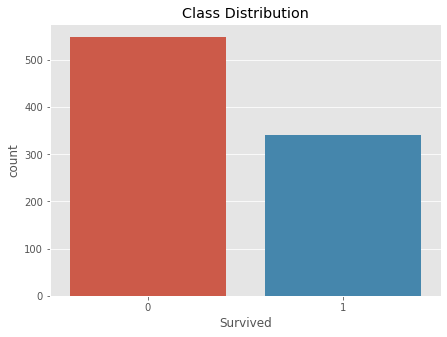

In [76]:
plt.subplots(figsize=(7, 5))
sns.countplot(x='Survived', data=train_df)
plt.title('Class Distribution')
plt.show()

Survived: 
0    549
1    342
Name: Survived, dtype: int64


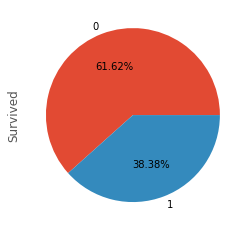

In [ ]:
# Survival count
s_temp = train_df['Survived'].value_counts()
print(f'Survived: \n{s_temp}')

# pie chart
train_df['Survived'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

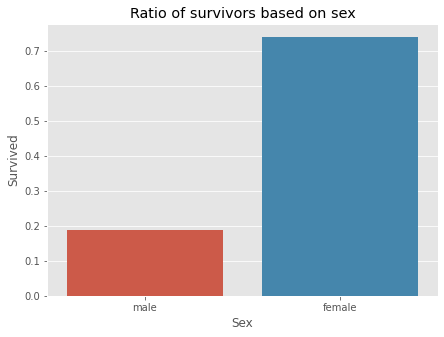

In [77]:
plt.subplots(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', data=train_df, ci=None)
plt.title('Ratio of survivors based on sex')
plt.show()

1    577
0    312
Name: Sex, dtype: int64


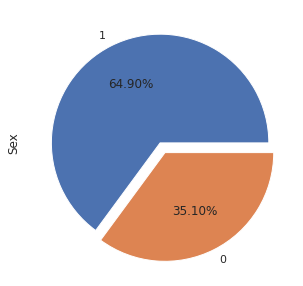

In [92]:
# count
temp = train_df.Sex.value_counts()
print(temp)

# pie 
plt.subplots(figsize=(7, 5))
train_df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%.2f%%')
plt.show()

In [90]:
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex  Survived
0    0            81
     1           231
1    0           468
     1           109
Name: Survived, dtype: int64

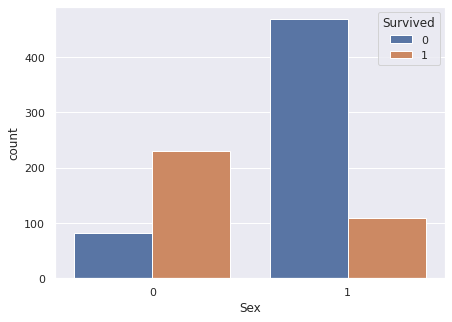

In [93]:
plt.subplots(figsize=(7, 5))
sns.countplot('Sex',hue='Survived',data=train_df)
plt.show()

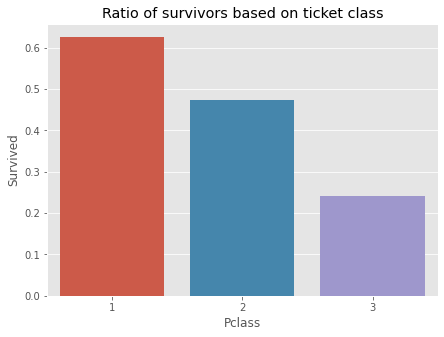

In [78]:
plt.subplots(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=train_df, ci=None)
plt.title('Ratio of survivors based on ticket class')
plt.show()

In [94]:
pd.crosstab([train_df['Sex'], train_df['Survived']], train_df.Pclass,margins=True)

Pclass          1    2    3  All
Sex Survived                    
0   0           3    6   72   81
    1          89   70   72  231
1   0          77   91  300  468
    1          45   17   47  109
All           214  184  491  889

In [95]:
pd.crosstab([train_df['Sex'], train_df['Survived']], train_df.Pclass,margins=True).style.background_gradient()

Pclass  Sex
1       0      0.967391
        1      0.368852
2       0      0.921053
        1      0.157407
3       0      0.500000
        1      0.135447
Name: Survived, dtype: float64


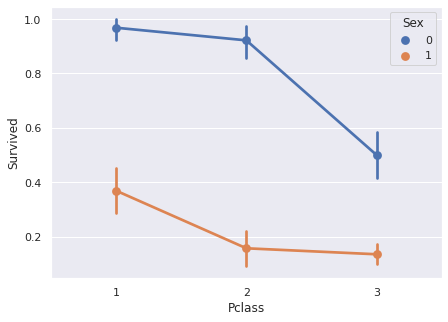

In [96]:
print(train_df.groupby(['Pclass', 'Sex'])['Survived'].mean())
plt.subplots(figsize=(7, 5))
sns.pointplot('Pclass','Survived',hue='Sex',data=train_df)
plt.show()

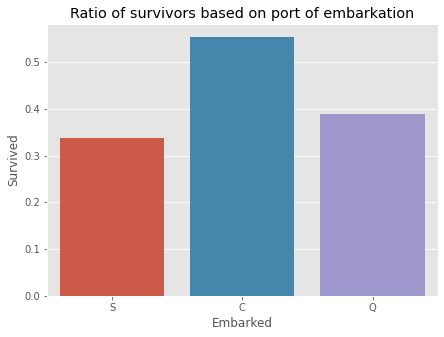

In [79]:
plt.subplots(figsize=(7, 5))
sns.barplot(x='Embarked', y='Survived', data=train_df, ci=None)
plt.title('Ratio of survivors based on port of embarkation')
plt.show()

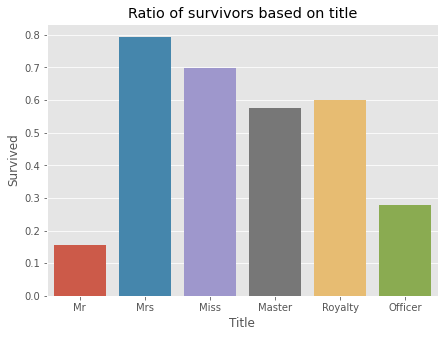

In [80]:
plt.subplots(figsize=(7, 5))
sns.barplot(x='Title', y='Survived', data=train_df, ci=None)
plt.title('Ratio of survivors based on title')
plt.show()

In [82]:
# Encode 'Sex' variable values
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])

In [83]:
# Convert 'Embarked' and 'Title' into dummy variables
train_df = pd.get_dummies(train_df, columns=['Embarked', 'Title'])
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Title'])

In [85]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,0
1,2,1,1,0,38.0,1,0,71.2833,1,0,0,0,0,0,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0
4,5,0,3,1,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,0


In [86]:
test_df.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,892,3,1,34.5,0,0,7.8292,0,1,0,0,0,1,0,0,0
1,893,3,0,47.0,1,0,7.0000,0,0,1,0,0,0,1,0,0
2,894,2,1,62.0,0,0,9.6875,0,1,0,0,0,1,0,0,0
3,895,3,1,27.0,0,0,8.6625,0,0,1,0,0,1,0,0,0
4,896,3,0,22.0,1,1,12.2875,0,0,1,0,0,0,1,0,0


In [87]:
# Pairwise correlation of columns
corr = train_df.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
PassengerId,1.000000,-0.005028,-0.035330,0.043136,0.035304,-0.057686,-0.001657,0.012703,-0.001208,-0.033694,0.022269,-0.026218,-0.064014,0.039008,0.005437,0.055440,0.031681
Survived,-0.005028,1.000000,-0.335549,-0.541585,-0.055756,-0.034040,0.083151,0.255290,0.169966,0.004536,-0.151777,0.085998,0.332094,-0.547689,0.343836,-0.030963,0.033666
Pclass,-0.035330,-0.335549,1.000000,0.127741,-0.412684,0.081656,0.016824,-0.548193,-0.245733,0.220558,0.076466,0.081547,-0.006737,0.139156,-0.151780,-0.149428,-0.118241
Sex,0.043136,-0.541585,0.127741,1.000000,0.111186,-0.116348,-0.247508,-0.179958,-0.084520,-0.075217,0.121405,0.159612,-0.692363,0.866888,-0.552629,0.088976,-0.007728
Age,0.035304,-0.055756,-0.412684,0.111186,1.000000,-0.299570,-0.199577,0.113625,0.049316,-0.086584,0.011295,-0.392649,-0.305175,0.215257,0.191443,0.189013,0.069560
SibSp,-0.057686,-0.034040,0.081656,-0.116348,-0.299570,1.000000,0.414542,0.160887,-0.060074,-0.026692,0.069438,0.349434,0.085939,-0.252201,0.061261,-0.024872,-0.008467
Parch,-0.001657,0.083151,0.016824,-0.247508,-0.199577,0.414542,1.000000,0.217532,-0.011588,-0.081585,0.061512,0.267194,0.103551,-0.335765,0.223240,-0.048377,-0.035673
Fare,0.012703,0.255290,-0.548193,-0.179958,0.113625,0.160887,0.217532,1.000000,0.270731,-0.116684,-0.163758,0.011390,0.119660,-0.181692,0.103920,0.010679,0.015222
Embarked_C,-0.001208,0.169966,-0.245733,-0.084520,0.049316,-0.060074,-0.011588,0.270731,1.000000,-0.148646,-0.782613,-0.035471,0.038498,-0.073976,0.067462,-0.008192,0.078960
Embarked_Q,-0.033694,0.004536,0.220558,-0.075217,-0.086584,-0.026692,-0.081585,-0.116684,-0.148646,1.000000,-0.499261,0.010330,0.169631,-0.079283,-0.090739,0.012520,-0.023159


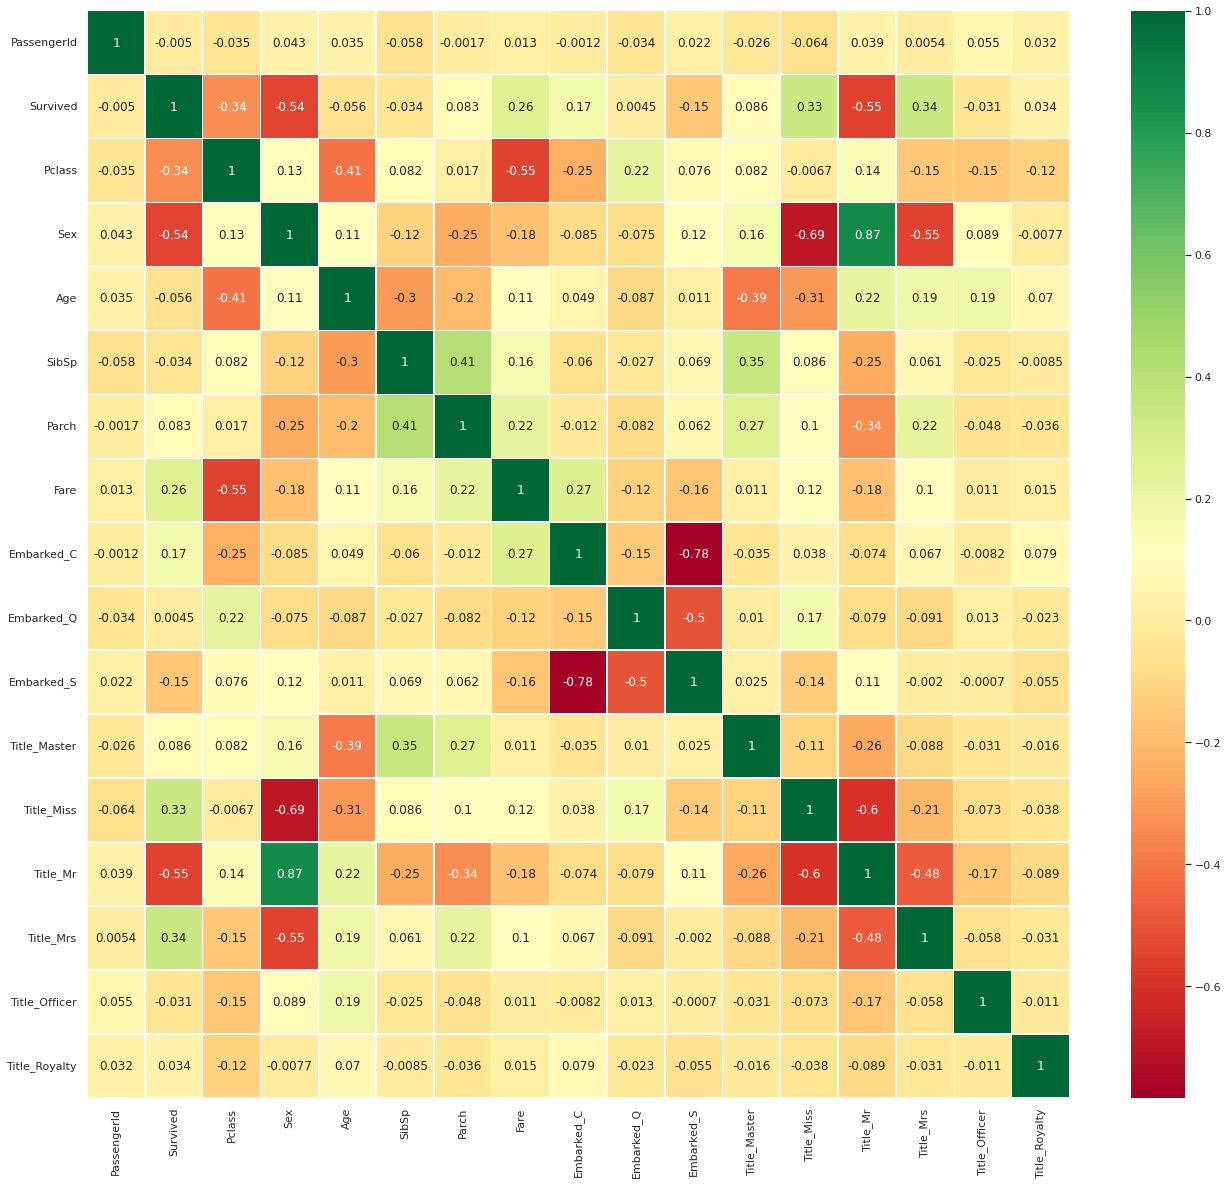

In [88]:
sns.set(rc={'figure.figsize': (22,20)})
ax = sns.heatmap(train_df.corr(), annot=True, linewidths=.5, cmap="RdYlGn")

In [97]:
# Apply feature scaling using MinMaxScaler
scaler = MinMaxScaler()
train_df.iloc[:, 2:] = scaler.fit_transform(train_df.iloc[:, 2:])
test_df.iloc[:, 1:] = scaler.transform(test_df.iloc[:, 1:])

In [98]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [99]:
X_train, X_test, y_train = train_df.iloc[:, 2:], test_df.iloc[:, 1:], train_df['Survived']

In [100]:
# Function to generate submission file to get test score
def submission(preds):
    test_df['Survived'] = preds
    predictions = test_df[['PassengerId', 'Survived']]
    predictions.to_csv('submission.csv', index=False)

In [102]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

83.13

In [103]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

87.74

In [104]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.31

In [105]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.31

In [106]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest',  
                
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest,   
                acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,98.31
3,Decision Tree,98.31
0,KNN,87.74
1,Logistic Regression,83.13


In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
parameters = {'n_estimators' : (10,30,50,70,90,100)
            ,'criterion' : ('gini', 'entropy') 
            ,'max_depth' : (3,5,7,9,10) 
            ,'max_features' : ('auto', 'sqrt')
            ,'min_samples_split' : (2,4,6)
             }

In [109]:
RF_grid = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score= False), param_grid = parameters, cv = 3, verbose = True)

In [111]:
RF_grid_model = RF_grid.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


In [112]:
RF_grid_model.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=30,
                       n_jobs=-1)

In [113]:
RF_grid_model.best_score_

0.8335342918676253

In [115]:
RF_Model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                 max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_samples_leaf=1, min_samples_split=6,
                                 min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                                 oob_score=False, random_state=None, verbose=0,
                                 warm_start=False)

In [117]:
RF_Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_split=6,
                       n_estimators=90, n_jobs=-1)

In [118]:
Y_pred = RF_Model.predict(X_test)

In [119]:
print(Y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [120]:
sub_test = test_df.drop(['PassengerId'], axis = 1)

In [121]:
sub_Y_pred = RF_Model.predict(sub_test).astype(int)

In [122]:
submission = pd.DataFrame({
       "PassengerId": test_df["PassengerId"],
      "Survived": sub_Y_pred
   })

submission.to_csv('submission.csv', index=False)

# New Section